Synthetic Data : 300 samples with d = 2

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
# Create a clustering blob with 2 dimensions
X, y = make_blobs(n_samples=300, centers=3,n_features=2, random_state=42)
# Create a list of lists for X, Y pairs
data_points1 = X.tolist()
data_array1 = np.array(data_points1)


Real Data : Mall Customers - 200 samples with d= 3

In [ ]:
import numpy as np
# Import Pandas
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df = df.drop(['CustomerID', 'Gender'], axis=1)
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Spending'})
df.head()
data_points2 = df.values.tolist()
data_array2 = np.array(data_points2)





#K-Means Clustering

In [ ]:
#K means clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform k-means clustering on the provided data points
def kmeans_Clustering(dtpoints, k, n_init=10):
    # Initialize KMeans with the specified number of clusters (k) and initialization runs (n_init)
    kmeans_cl = KMeans(n_clusters=k, n_init=n_init)
    # Fit the model on the data points
    kmeans_cl.fit(dtpoints)
    # Predict the closest cluster each sample in datapoints belongs to
    labels = kmeans_cl.predict(dtpoints)
    # Get the coordinates of the cluster centers
    centroids = kmeans_cl.cluster_centers_
    return labels, centroids

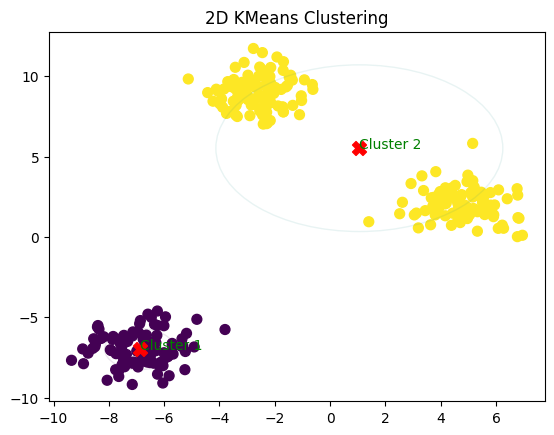

Cluster 1: (-7.338988090691514, -7.729953962740739), (-7.740040556435223, -7.264665137505772), (-8.917751726329124, -7.888195904193351), (-7.530269760273097, -7.367234977040643), (-8.507169629034433, -6.832024646614564), (-6.9919552408421, -7.10107919280917), (-6.349823013235987, -5.438540972618046), (-7.456398521719603, -6.124718367450191), (-6.049291374607025, -7.736193419184814), (-8.394818253349822, -5.513235325831422), (-6.122638574505919, -7.802274917453572), (-6.986657551105828, -7.915351915695321), (-7.3672334152237635, -7.312667781095567), (-6.808060953931878, -7.357767040041063), (-6.542024529076068, -7.291986559398414), (-6.887599832467887, -5.40016545438592), (-6.513028945054422, -7.819989379603302), (-5.700330007087444, -6.812591111865838), (-6.485175048772973, -7.301094074096209), (-6.6440126330427045, -6.10924439938898), (-3.8007463826960324, -5.76053468184137), (-7.1285913396303435, -5.9085386423215915), (-6.1680123130623805, -8.004751685113815), (-8.583009630506425, -6

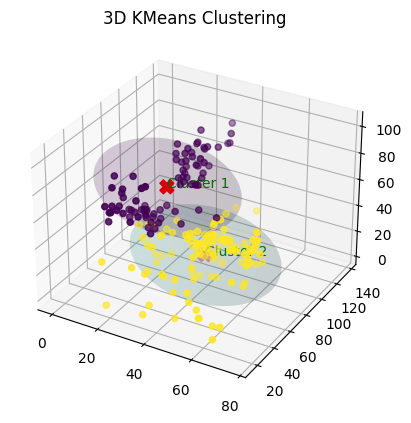

Cluster 1: (21, 15, 81), (23, 16, 77), (22, 17, 76), (23, 18, 94), (30, 19, 72), (35, 19, 99), (24, 20, 77), (22, 20, 79), (20, 21, 66), (35, 23, 98), (25, 24, 73), (31, 25, 73), (29, 28, 82), (35, 28, 61), (23, 29, 87), (21, 30, 73), (18, 33, 92), (21, 33, 81), (30, 34, 73), (20, 37, 75), (24, 38, 92), (31, 39, 61), (24, 39, 65), (33, 42, 60), (31, 43, 54), (27, 46, 51), (19, 46, 55), (18, 48, 59), (19, 48, 59), (26, 54, 54), (23, 54, 52), (38, 54, 55), (21, 54, 57), (22, 57, 55), (34, 58, 60), (24, 60, 52), (27, 60, 50), (20, 61, 49), (26, 62, 55), (19, 63, 54), (19, 64, 46), (18, 65, 48), (19, 65, 50), (49, 65, 59), (27, 67, 56), (40, 69, 58), (39, 69, 91), (31, 70, 77), (40, 71, 95), (38, 71, 75), (39, 71, 75), (31, 72, 71), (29, 73, 88), (32, 73, 73), (35, 74, 72), (32, 75, 93), (32, 76, 87), (28, 77, 97), (32, 77, 74), (34, 78, 90), (39, 78, 88), (38, 78, 76), (27, 78, 89), (30, 78, 78), (30, 78, 73), (29, 79, 83), (31, 81, 93), (36, 85, 75), (33, 86, 95), (32, 87, 63), (28, 87, 

In [ ]:
# K means clustering with synthetic data
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#2D
def draw_circle(ax, center, radius, color, alpha=0.1):
    # Initialize a circle with the specified center, radius, color, and transparency
    circle = plt.Circle(center, radius, color=color, alpha=alpha, fill=False)
    # Add the circle to the Axes instance 'ax'
    ax.add_artist(circle)
#3D
def draw_sphere(ax, center, radius, color, alpha=0.1):
    # Create an array of angles from 0 to 2*pi for the u component
    u = np.linspace(0, 2 * np.pi, 100)
    # Create an array of angles from 0 to pi for the v component
    v = np.linspace(0, np.pi, 100)

    # Calculate the X coordinates of the sphere's surface
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    # Calculate the Y coordinates of the sphere's surface
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    # Calculate the Z coordinates of the sphere's surface
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # Add the surface plot to the Axes instance 'ax' using the calculated coordinates
    ax.plot_surface(x, y, z, color=color, alpha=alpha)
#plot 2D, 3D
def plot_kmeans_Clustering(dtpoints, lbls, mu_centroids):
    # Determine the number of dimensions of the data points
    dim = dtpoints.shape[1]
    if dim == 3: # Check if data is 3-dimensional
        # Initialize a new figure for 3D plotting
        fig = plt.figure()
        # Add a 3D subplot to the figure with 3D projection
        ax = fig.add_subplot(111, projection='3d')
        # Scatter plot the data points with labels determining the color
        ax.scatter(dtpoints[:, 0], dtpoints[:, 1], dtpoints[:, 2], c=lbls, cmap='viridis')
        # Scatter plot the centroids with red color and a distinct 'X' marker
        ax.scatter(mu_centroids[:, 0], mu_centroids[:, 1], mu_centroids[:, 2], c='red', s=100, marker='X')
        # Iterate over centroids to label them
        for i, centroid in enumerate(mu_centroids):
            # Annotate the centroid with its cluster number
            ax.text(centroid[0], centroid[1], centroid[2], f'Cluster {i+1}', color='green')

        # Draw spheres around each centroid based on the average distance of cluster members
        for i, centroid in enumerate(mu_centroids):
            # Select points that belong to the current cluster
            s_cluster_points = dtpoints[lbls == i]
            # Check if there are any points in the current cluster
            if len(s_cluster_points) > 0:
                # Calculate the average distance of points in the cluster to the centroid
                avg_distance = np.mean(np.linalg.norm(s_cluster_points - centroid, axis=1))
                # Call function to draw a sphere with calculated average distance as radius
                draw_sphere(ax, centroid, avg_distance, color=plt.cm.viridis(i / len(mu_centroids)))

        # Set the title of the 3D plot
        plt.title('3D KMeans Clustering')

    elif dim == 2: # Check if data is 2-dimensional
        # Initialize a new figure for 2D plotting
        fig, ax = plt.subplots()
        # Scatter plot the data points with labels determining the color
        ax.scatter(dtpoints[:, 0], dtpoints[:, 1], c=lbls, cmap='viridis', s=50)
        # Scatter plot the centroids with red color and a distinct 'X' marker
        ax.scatter(mu_centroids[:, 0], mu_centroids[:, 1], c='red', s=100, marker='X')
        # Iterate over centroids to label them
        for i, centroid in enumerate(mu_centroids):
            # Annotate the centroid with its cluster number
            ax.text(centroid[0], centroid[1], f'Cluster {i+1}', color='green')

        # Draw circles around each centroid based on the average distance of cluster members
        for i, centroid in enumerate(mu_centroids):
            # Select points that belong to the current cluster
            s_cluster_points = dtpoints[lbls == i]
            # Check if there are any points in the current cluster
            if len(s_cluster_points) > 0:
                # Calculate the average distance of points in the cluster to the centroid
                avg_distance = np.mean(np.linalg.norm(s_cluster_points - centroid, axis=1))
                # Call the function to draw a circle with the average distance as radius
                draw_circle(ax, centroid, avg_distance, color=plt.cm.viridis(i / len(mu_centroids)))

        # Set the title of the 2D plot
        plt.title('2D KMeans Clustering')

    # Display the plot
    plt.show()


# k is set to the number of desired clusters
k = 2

# K-means clustering is performed on both sets of data (2D and 3D)
labels1, centroids1 = kmeans_Clustering(data_array1, k, n_init=10)
labels2, centroids2 = kmeans_Clustering(data_array2, k, n_init=10)

# The clustering results for data_points1 are plotted using the plot_kmeans_Clustering function
plot_kmeans_Clustering(data_array1, labels1, centroids1)

# The points in each cluster for data_points1 are printed
for i in range(k):
    cluster_points1 = data_array1[labels1 == i]
    # Points are formatted as strings and joined with commas for readability
    points_str = ', '.join([str(tuple(pt)) for pt in cluster_points1])
    print(f"Cluster {i + 1}: {points_str}")

# The clustering results for data_points2 are plotted using the same plotting function
plot_kmeans_Clustering(data_array2, labels2, centroids2)

# The points in each cluster for data_points2 are printed
for i in range(k):
    cluster_points2 = data_array2[labels2 == i]
    # Points are formatted as strings and joined with commas for readability
    points_str = ', '.join([str(tuple(pt)) for pt in cluster_points2])
    print(f"Cluster {i + 1}: {points_str}")



## DBScan Implementation

In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#DBSCAN function
def perform_dbscan(data, eps, min_samples):

    # Convert the data to a numpy array
    X = np.array(data)

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create and fit a DBSCAN model
    #eps : Epsilon (Eps): the distance between each data point to its closest neighbor using the Nearest Neighbours
    #min_samples :  minimum number of Points per cluster - suggested 2* dimensionality
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')

    #fitting the model
    dbscan.fit(X_scaled)

    # Get the cluster labels
    labels = dbscan.labels_
    #labels (numpy array): Array of cluster labels assigned by DBSCAN
    return labels


Results and Visualization

2d

Cluster 0 - Data Points: [[-7.338988090691514, -7.729953962740739], [-7.740040556435223, -7.264665137505772], [-8.917751726329124, -7.888195904193351], [-7.530269760273097, -7.367234977040643], [-8.507169629034433, -6.832024646614564], [-6.9919552408421, -7.10107919280917], [-6.349823013235987, -5.438540972618046], [-7.456398521719603, -6.124718367450191], [-6.049291374607025, -7.736193419184814], [-8.394818253349822, -5.513235325831422], [-6.122638574505919, -7.802274917453572], [-6.986657551105828, -7.915351915695321], [-7.3672334152237635, -7.312667781095567], [-6.808060953931878, -7.357767040041063], [-6.542024529076068, -7.291986559398414], [-6.887599832467887, -5.40016545438592], [-6.513028945054422, -7.819989379603302], [-5.700330007087444, -6.812591111865838], [-6.485175048772973, -7.301094074096209], [-6.6440126330427045, -6.10924439938898], [-3.8007463826960324, -5.76053468184137], [-7.1285913396303435, -5.9085386423215915], [-6.1680123130623805, -8.004751685113815], [-8.5830

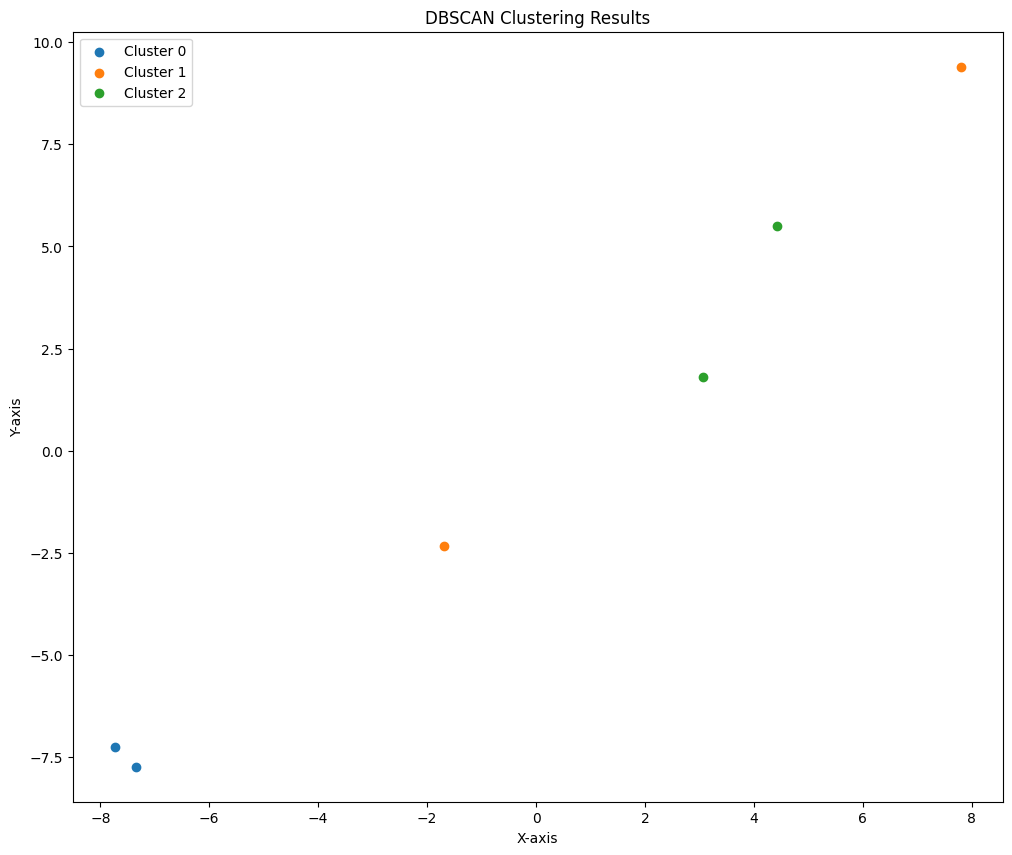

In [ ]:
cluster_labels = perform_dbscan(data_points1, eps=0.5, min_samples=2)
# Separate data points by cluster label
#dictionary of all cluster labels against the data point : {cluster_label : points in the cluster}
clusters = {}
for i, label in enumerate(cluster_labels):
    if label in clusters:
        clusters[label].append(data_points1[i])
    else:
        clusters[label] = [data_points1[i]]

# Plot the clustering results
plt.figure(figsize=(12, 10))
#plot data points in each cluster
for label, points in clusters.items():
    plt.scatter(points[0],points[1], label=f'Cluster {label}')
    #printing the data points for each labeld cluster
    print(f'Cluster {label} - Data Points: {points}')

#graph properties
plt.title('DBSCAN Clustering Results')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


3-d

Cluster -1 - Data Points: [[19, 15, 39], [20, 16, 6], [23, 18, 94], [52, 23, 29], [46, 25, 5], [35, 28, 61], [60, 30, 4], [42, 34, 17], [65, 38, 35], [40, 69, 58], [56, 79, 35], [50, 85, 26], [54, 101, 24], [33, 113, 8], [47, 120, 16], [45, 126, 28], [32, 137, 18], [30, 137, 83]]
Cluster 0 - Data Points: [[21, 15, 81], [23, 16, 77], [22, 17, 76], [30, 19, 72], [24, 20, 77], [22, 20, 79], [20, 21, 66], [25, 24, 73], [31, 25, 73], [29, 28, 82], [23, 29, 87], [21, 30, 73], [18, 33, 92], [21, 33, 81], [30, 34, 73], [20, 37, 75], [24, 38, 92], [24, 39, 65]]
Cluster 1 - Data Points: [[31, 17, 40], [35, 21, 35], [35, 24, 35], [45, 28, 32], [40, 29, 31], [36, 37, 26], [48, 39, 36], [31, 39, 61], [49, 39, 28], [50, 40, 55], [27, 40, 47], [29, 40, 42], [31, 40, 42], [49, 42, 52], [33, 42, 60], [31, 43, 54], [59, 43, 60], [50, 43, 45], [47, 43, 41], [51, 44, 50], [69, 44, 46], [27, 46, 51], [53, 46, 46], [70, 46, 56], [19, 46, 55], [67, 47, 52], [54, 47, 59], [63, 48, 51], [18, 48, 59], [43, 48, 

<function matplotlib.pyplot.show(close=None, block=None)>

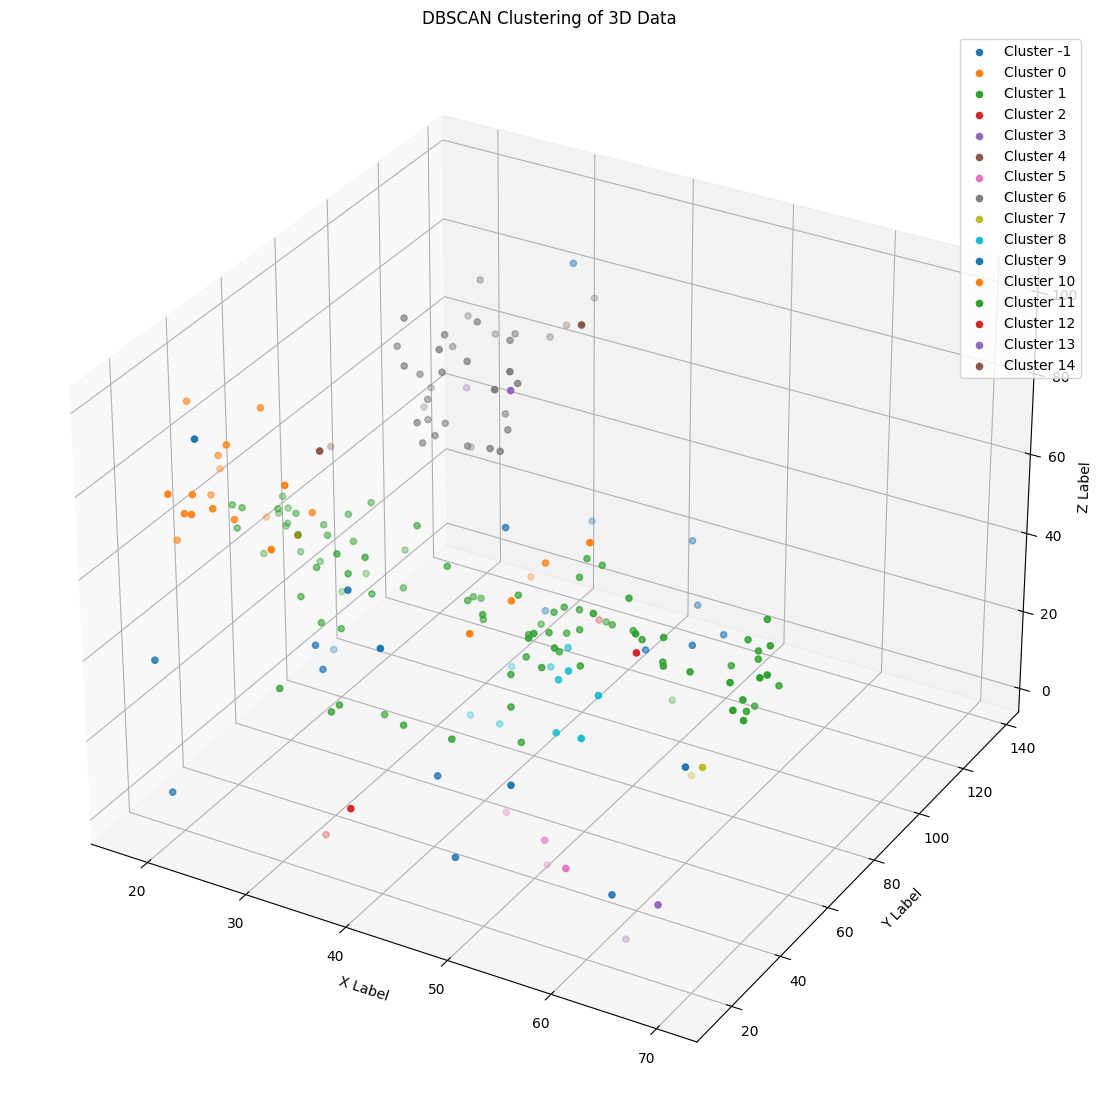

In [ ]:

cluster_labels = perform_dbscan(data_points2, eps=0.5, min_samples=2)
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot for the clusters
fig = plt.figure(figsize=(40, 14))
ax = fig.add_subplot(111, projection='3d')


# Separate data points by cluster label
#dictionary of all cluster labels against the data point : {cluster_label : points in the cluster}
clusters3 = {}
for i, label in enumerate(cluster_labels):
    if label in clusters3:
        clusters3[label].append(data_points2[i])
    else:
        clusters3[label] = [data_points2[i]]


#plot data points in each cluster
for label, points in clusters3.items():
    cluster_points = np.array(points)  # Convert points to a NumPy array
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {label}')
    #printing the data points for each labeld cluster
    print(f'Cluster {label} - Data Points: {points}')

#graph properties
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('DBSCAN Clustering of 3D Data')
ax.legend()
plt.show
